# 序論：森林火災、フラクタル構造をした油田、拡散

## パーコレーションとは？

In [1]:
using Pkg
using Random
Pkg.add("Distributions")
using Distributions
Pkg.add("Plots")
using Plots
Pkg.add("PyPlot")
pyplot()

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


Plots.PyPlotBackend()

In [2]:
"""
    binomialmap(p, dims）
    dimsで示される行列に二項分布（確率p）を生成する
"""
function binomialmap(p::Float64, dims::Tuple{Int,Int})
      return rand(Binomial(1,p),dims[1],dims[2])
end

"""
    binomialmap(p, s）
    s×sで示される正方行列に二項分布（確率p）を生成する
"""
function binomialmap(p::Float64, s::Int)
      return rand(Binomial(1,p),s,s)
end


binomialmap

In [17]:
"""
    blockmap(data; color, yflip, title, titlelocation)
    dataで示されるマップに対応して，colorで示される色で表示する
    yflipがtrueの場合は上下を反転して表示する
"""
function blockmap(data::Array{Int,2}; color::Array{Symbol}, yflip::Bool = true, 
                  title::String = "", titlelocation::String = "center")
    heatmap(data, color = color, yflip = yflip, 
            framestyle = :grid, showaxis = false, bg = :black, colorbar = :none, aspectratio = 1,
            title = title, titlelocation  = titlelocation)
end

blockmap

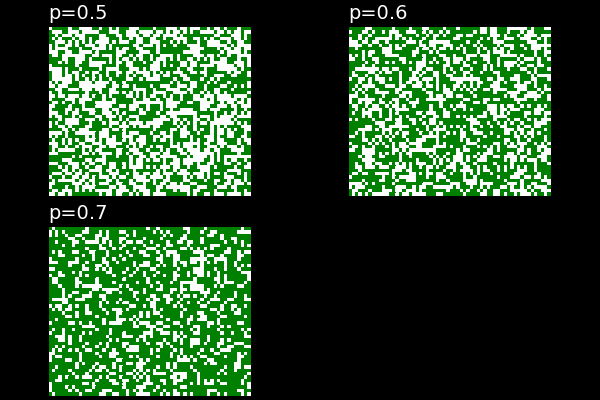

In [21]:
plt=[]
for p = 0.5:0.1:0.7
    data = binomialmap(p,(50,60))
    push!(plt,blockmap(data, color = [:white,:green], title = "p=$(p)", titlelocation = "left"))
end
plot(plt...)

In [20]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series:`, `:Subplot:`, `:Plot` or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring; e.g. `plotattr("seriestype")`.
